Build convolutional neural networks (CNNs) to enhance computer vision.

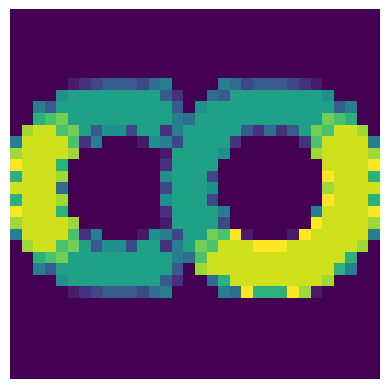

In [34]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import requests
from PIL import Image
from io import BytesIO
import tempfile

url = 'https://www.tensorflow.org/images/colab_logo_32px.png'
response = requests.get(url)

if response.status_code == 200:
    with tempfile.NamedTemporaryFile(delete=False) as tmp_file:
        tmp_file.write(response.content)
        tmp_file_path = tmp_file.name

    try:
        img = Image.open(tmp_file_path)
        i = np.array(img)
        plt.imshow(i)
        plt.axis('off')
        plt.show()
    except Exception as e:
        print(f"Error opening image from file: {e}")

    import os
    os.unlink(tmp_file_path)
else:
    print(f"Failed to download image. Status code: {response.status_code}")

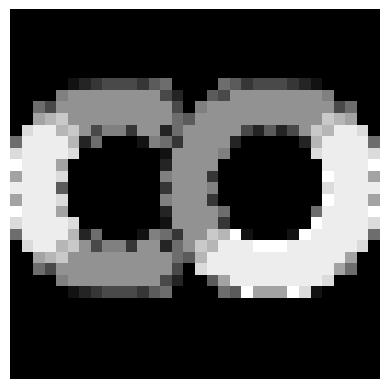

In [35]:
import matplotlib.pyplot as plt
plt.grid(False)
plt.gray()
plt.axis('off')
plt.imshow(i)
plt.show()

In [36]:
i_transformed = np.copy(i)
size_x = i_transformed.shape[0]
size_y = i_transformed.shape[1]

In [38]:
# This filter detects edges nicely
# It creates a filter that only passes through sharp edges and straight lines.
# Experiment with different values for fun effects.
#filter = [ [0, 1, 0], [1, -4, 1], [0, 1, 0]]
# A couple more filters to try for fun!
filter = [ [-1, -2, -1], [0, 0, 0], [1, 2, 1]]
#filter = [ [-1, 0, 1], [-2, 0, 2], [-1, 0, 1]]
 # If all the digits in the filter don't add up to 0 or 1, you
# should probably do a weight to get it to do so
# so, for example, if your weights are 1,1,1 1,2,1 1,1,1
# They add up to 10, so you would set a weight of .1 if you want to normalize them
weight  = 1

In [44]:
for x in range(1,size_x-1):
  for y in range(1,size_y-1):
      output_pixel = 0.0
      output_pixel = output_pixel + (float(i[x - 1, y-1]) * filter[0][0])
      output_pixel = output_pixel + (float(i[x, y-1]) * filter[0][1])
      output_pixel = output_pixel + (float(i[x + 1, y-1]) * filter[0][2])
      output_pixel = output_pixel + (float(i[x-1, y]) * filter[1][0])
      output_pixel = output_pixel + (float(i[x, y]) * filter[1][1])
      output_pixel = output_pixel + (float(i[x+1, y]) * filter[1][2])
      output_pixel = output_pixel + (float(i[x-1, y+1]) * filter[2][0])
      output_pixel = output_pixel + (float(i[x, y+1]) * filter[2][1])
      output_pixel = output_pixel + (float(i[x+1, y+1]) * filter[2][2])
      output_pixel = output_pixel * weight
      output_pixel = max(0, min(255, output_pixel))
      i_transformed[x, y] = np.uint8(output_pixel)

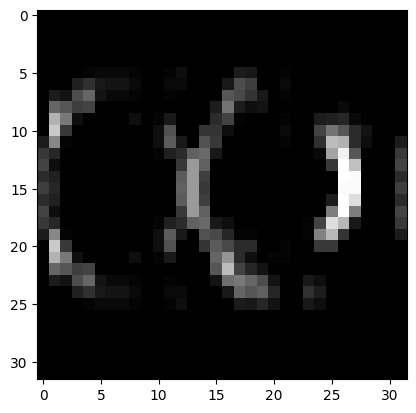

In [45]:
# Plot the image. Note the size of the axes -- they are 512 by 512
plt.gray()
plt.grid(False)
plt.imshow(i_transformed)
#plt.axis('off')
plt.show()

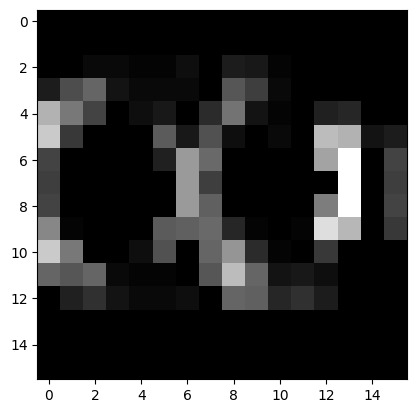

In [46]:
new_x = int(size_x/2)
new_y = int(size_y/2)
newImage = np.zeros((new_x, new_y))
for x in range(0, size_x, 2):
  for y in range(0, size_y, 2):
    pixels = []
    pixels.append(i_transformed[x, y])
    pixels.append(i_transformed[x+1, y])
    pixels.append(i_transformed[x, y+1])
    pixels.append(i_transformed[x+1, y+1])
    pixels.sort(reverse=True)
    newImage[int(x/2),int(y/2)] = pixels[0]

# Plot the image. Note the size of the axes -- now 256 pixels instead of 512
plt.gray()
plt.grid(False)
plt.imshow(newImage)
#plt.axis('off')
plt.show()

In [47]:
import tensorflow as tf
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images/255.0
test_images=test_images/255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=5)
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print ('Test loss: {}, Test accuracy: {}'.format(test_loss, test_accuracy*100))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.7798 - loss: 0.6417
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.8602 - loss: 0.3844
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8761 - loss: 0.3388
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8846 - loss: 0.3110
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8925 - loss: 0.2924
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8724 - loss: 0.3718
Test loss: 0.380087673664093, Test accuracy: 86.90999746322632


In [48]:
import tensorflow as tf
print(tf.__version__)
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images.reshape(60000, 28, 28, 1)
training_images=training_images / 255.0
test_images = test_images.reshape(10000, 28, 28, 1)
test_images=test_images / 255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()
model.fit(training_images, training_labels, epochs=5)
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print ('Test loss: {}, Test accuracy: {}'.format(test_loss, test_accuracy*100))

2.18.0


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 243,786 (952.29 KB)

 Trainable params: 243,786 (952.29 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 94s 49ms/step - accuracy: 0.7811 - loss: 0.6149
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 90s 48ms/step - accuracy: 0.8885 - loss: 0.3068
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 142s 48ms/step - accuracy: 0.9055 - loss: 0.2563
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 91s 49ms/step - accuracy: 0.9168 - loss: 0.2233
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 140s 47ms/step - accuracy: 0.9298 - loss: 0.1880
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.9021 - loss: 0.2680
Test loss: 0.25569337606430054, Test accuracy: 90.67000150680542


In [49]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=5)
test_loss, test_acc = model.evaluate(test_images, test_labels)
print ('Test loss: {}, Test accuracy: {}'.format(test_loss, test_acc*100))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 91s 48ms/step - accuracy: 0.9375 - loss: 0.1670
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 143s 48ms/step - accuracy: 0.9447 - loss: 0.1500
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 142s 48ms/step - accuracy: 0.9505 - loss: 0.1283
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 141s 48ms/step - accuracy: 0.9578 - loss: 0.1114
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 142s 48ms/step - accuracy: 0.9637 - loss: 0.0959
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.9097 - loss: 0.3114
Test loss: 0.3052312433719635, Test accuracy: 91.11999869346619
